In [1]:
%pip install matplotlib
%pip install sklearn
%pip install seaborn
%pip install scipy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset (replace 'energy_data.csv' with your file name)
data = pd.read_csv('B_energy_data.csv')
data.head(5)

,Outdoor Temperature (°C),Building Area (sq ft),Occupancy Rate (%),HVAC Efficiency,Energy Consumption (kWh)
0,22.8,11822,76.2,0.75,1723
1,33.6,10992,42.6,0.63,2346
2,18.6,7999,81.3,0.78,1050
3,24.6,12708,65.5,0.86,1367
4,32.1,13857,74.2,0.62,2601


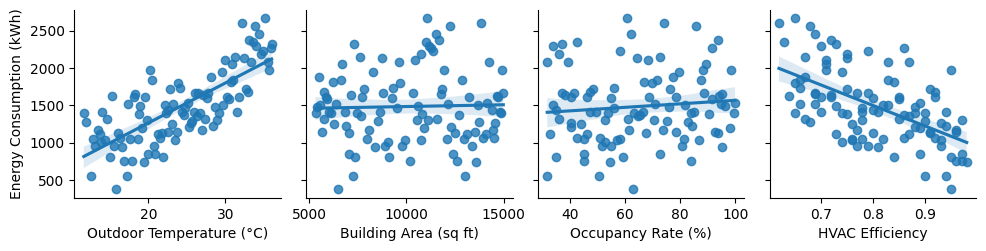

In [4]:

# Create scatter plots for each independent variable against the dependent variable
sns.pairplot(data, x_vars=['Outdoor Temperature (°C)','Building Area (sq ft)', 'Occupancy Rate (%)','HVAC Efficiency'], y_vars=['Energy Consumption (kWh)'], kind='reg')
plt.show()



                          Outdoor Temperature (°C)  Building Area (sq ft)  \
Outdoor Temperature (°C)                  1.000000              -0.360965   
Building Area (sq ft)                    -0.360965               1.000000   
Occupancy Rate (%)                       -0.156483               0.064322   
HVAC Efficiency                           0.021064              -0.185430   
Energy Consumption (kWh)                  0.754291               0.028761   

                          Occupancy Rate (%)  HVAC Efficiency  \
Outdoor Temperature (°C)           -0.156483         0.021064   
Building Area (sq ft)               0.064322        -0.185430   
Occupancy Rate (%)                  1.000000        -0.182203   
HVAC Efficiency                    -0.182203         1.000000   
Energy Consumption (kWh)            0.097232        -0.568893   

                          Energy Consumption (kWh)  
Outdoor Temperature (°C)                  0.754291  
Building Area (sq ft)                   

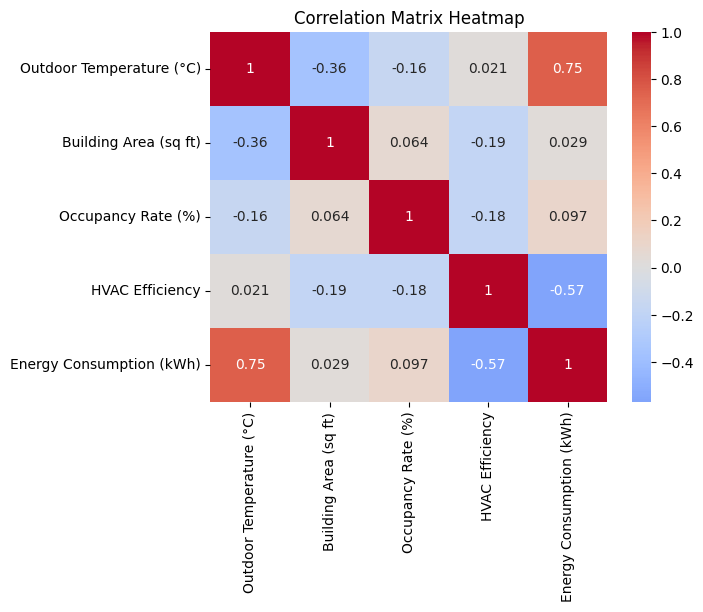

In [5]:

# Calculate the correlation matrix {-1 : 0 : 1}
correlation_matrix = data.corr()
print(correlation_matrix)


# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:

# Assess normality for each independent variable
for column in ['Outdoor Temperature (°C)', 'Building Area (sq ft)', 'Occupancy Rate (%)','HVAC Efficiency']:
    stat, p = shapiro(data[column])
    print(f'Variable: {column}')
    print(f'Shapiro-Wilk Test Statistic: {stat:.4f}')
    print(f'P-value: {p:.4f}')
    if p > 0.05:
        print('Data is likely normally distributed.')
    else:
        print('Data is likely not normally distributed.')
    print()


Variable: Outdoor Temperature (°C)
Shapiro-Wilk Test Statistic: 0.9644
P-value: 0.0075
Data is likely not normally distributed.

Variable: Building Area (sq ft)
Shapiro-Wilk Test Statistic: 0.9442
P-value: 0.0003
Data is likely not normally distributed.

Variable: Occupancy Rate (%)
Shapiro-Wilk Test Statistic: 0.9521
P-value: 0.0010
Data is likely not normally distributed.

Variable: HVAC Efficiency
Shapiro-Wilk Test Statistic: 0.9562
P-value: 0.0019
Data is likely not normally distributed.



In [8]:

# Split data into features (X) and target (y)
X = data[['Outdoor Temperature (°C)', 'Building Area (sq ft)', 'Occupancy Rate (%)','HVAC Efficiency']]  # Independent variables
y = data['Energy Consumption (kWh)']  # Dependent variable


In [9]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
print(X_train.shape) # It should be (number_of_samples, 4).

(81, 4)


In [12]:

# Get model coefficients
coefficients = model.coef_
intercept = model.intercept_


In [13]:

# Print the equation
print(f"Equation: y = {intercept:.2f} + {coefficients[0]:.2f} * Outdoor Temperature (°C) + {coefficients[1]:.2f} * Building Area (sq ft) + {coefficients[2]:.2f} * Occupancy Rate (%) + {coefficients[3]:.2f} * 'HVAC Efficiency'")


Equation: y = 1438.50 + 61.48 * Outdoor Temperature (°C) + 0.04 * Building Area (sq ft) + 3.10 * Occupancy Rate (%) + -2516.24 * 'HVAC Efficiency'


In [14]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
print(X_test.head(1))

    Outdoor Temperature (°C)  Building Area (sq ft)  Occupancy Rate (%)  \
30                      28.9                  10540                52.8   

    HVAC Efficiency  
30             0.97  


In [17]:
# Example specific values
data = {
    'Outdoor Temperature (°C)': [35],  
    'Building Area (sq ft)': [800],   
    'Occupancy Rate (%)': [2],       
    'HVAC Efficiency': [0.64]
}

# Create the DataFrame
xyz = pd.DataFrame(data)

# Predict energy consumption
predicted_ec = model.predict(xyz)
print(predicted_ec)

[2017.04514207]


In [18]:

# Evaluate model performance

# y_test is the actual values from your test set.
# y_pred is the predicted values from your model.

mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')  # the squared difference between the actual and predicted values 
print(f'R-squared: {r2:.2f}')            # explains _% of the variability in the data.


Mean Squared Error: 6052.97
R-squared: 0.98


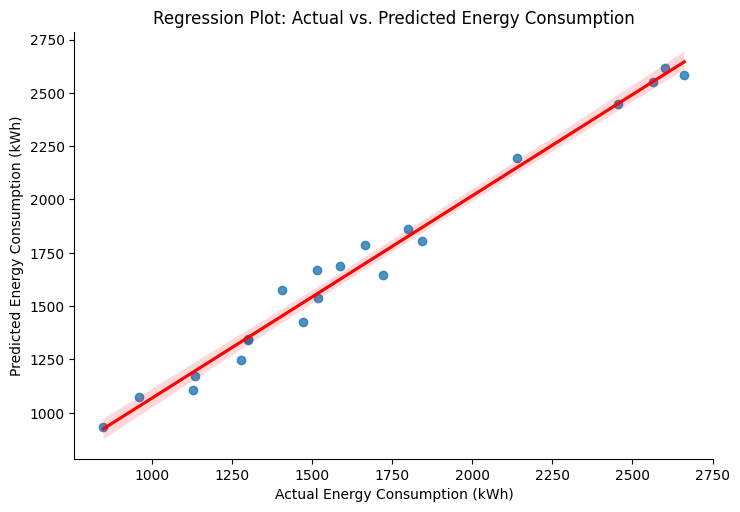

In [20]:
# visualizations

# y_test and y_pred are actual and predicted values

# DataFrame for easier plotting
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting regression line with the scatter plot
sns.lmplot(x='Actual', y='Predicted', data=df, aspect=1.5, line_kws={'color': 'red'})
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Regression Plot: Actual vs. Predicted Energy Consumption")
plt.show()
